# Analysis of COVID-19 Data

So we start off by querying the version of Pandas used. Knowing this is always helpful when it comes to debugging certain problems.

In [243]:
import pandas as pd
print("Pandas Version = " + pd.__version__)
import numpy as np
print("Numpy Version = " + np.__version__)
import matplotlib
print("Matplotlib Version = " + matplotlib.__version__)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16, 4)

Pandas Version = 1.0.3
Numpy Version = 1.18.4
Matplotlib Version = 3.2.1


Now we are fetching data from the url provided by "Our World in Data", which you can learn more about by visiting this [link](https://github.com/owid/covid-19-data/tree/master/public/data). 

I thank Edouard Mathieu and his fellow collaborators for this awesome work. They have accumulated the COVID-19 testing rates for every country along with all other relevant information. They are regularly updating the data as well.

In [244]:
data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [251]:
bangladesh = data[data["location"] == "Bangladesh"].reset_index()
australia = data[data["location"] == "Australia"].reset_index()
india = data[data["location"] == "India"].reset_index()

bangladesh = bangladesh[["date", "total_deaths", "total_tests", "total_cases"]]
australia = australia[["date", "total_deaths", "total_tests", "total_cases"]]
india = india[["date", "total_deaths", "total_tests", "total_cases"]]

In [252]:
bangladesh.head()

,date,total_deaths,total_tests,total_cases
0,2020-03-04,0,108.0,0
1,2020-03-05,0,111.0,0
2,2020-03-07,0,120.0,0
3,2020-03-08,0,127.0,0
4,2020-03-09,0,137.0,3


In [253]:
australia.head()

,date,total_deaths,total_tests,total_cases
0,2019-12-31,0,NaN,0
1,2020-01-01,0,NaN,0
2,2020-01-02,0,NaN,0
3,2020-01-03,0,NaN,0
4,2020-01-04,0,NaN,0


In [254]:
india.head()

,date,total_deaths,total_tests,total_cases
0,2019-12-31,0,NaN,0
1,2020-01-01,0,NaN,0
2,2020-01-02,0,NaN,0
3,2020-01-03,0,NaN,0
4,2020-01-04,0,NaN,0


In [255]:
bangladesh["date"] = pd.to_datetime(bangladesh["date"])

australia["date"] = pd.to_datetime(australia["date"])

india["date"] = pd.to_datetime(india["date"])

bangladesh = bangladesh.set_index("date")

australia = australia.set_index("date")

india = india.set_index("date")

In [256]:
bangladesh.head()

,total_deaths,total_tests,total_cases
date,,,
2020-03-04,0,108.0,0
2020-03-05,0,111.0,0
2020-03-07,0,120.0,0
2020-03-08,0,127.0,0
2020-03-09,0,137.0,3


In [257]:
australia.head()

,total_deaths,total_tests,total_cases
date,,,
2019-12-31,0,NaN,0
2020-01-01,0,NaN,0
2020-01-02,0,NaN,0
2020-01-03,0,NaN,0
2020-01-04,0,NaN,0


In [258]:
india.head()

,total_deaths,total_tests,total_cases
date,,,
2019-12-31,0,NaN,0
2020-01-01,0,NaN,0
2020-01-02,0,NaN,0
2020-01-03,0,NaN,0
2020-01-04,0,NaN,0


In [259]:
bangladesh["total_deaths_normalized"] = (bangladesh["total_deaths"] / bangladesh["total_tests"])
bangladesh["total_cases_normalized"] = (bangladesh["total_cases"] / bangladesh["total_tests"])
bangladesh = bangladesh.replace(np.inf, 0)
bangladesh = bangladesh.replace(np.nan, 0)

australia["total_deaths_normalized"] = (australia["total_deaths"] / australia["total_tests"])
australia["total_cases_normalized"] = (australia["total_cases"] / australia["total_tests"]) 
australia = australia.replace(np.inf, 0)
australia = australia.replace(np.nan, 0)

india["total_deaths_normalized"] = (india["total_deaths"] / india["total_tests"])
india["total_cases_normalized"] = (india["total_cases"] / india["total_tests"]) 
india = india.replace(np.inf, 0)
india = india.replace(np.nan, 0)

In [260]:
bangladesh

,total_deaths,total_tests,total_cases,total_deaths_normalized,total_cases_normalized
date,,,,,
2020-03-04,0,108.0,0,0.000000,0.000000
2020-03-05,0,111.0,0,0.000000,0.000000
2020-03-07,0,120.0,0,0.000000,0.000000
2020-03-08,0,127.0,0,0.000000,0.000000
2020-03-09,0,137.0,3,0.000000,0.021898
...,...,...,...,...,...
2020-05-10,214,122657.0,13770,0.001745,0.112264
2020-05-11,228,129865.0,14657,0.001756,0.112863
2020-05-12,239,136638.0,15691,0.001749,0.114836


In [261]:
australia

,total_deaths,total_tests,total_cases,total_deaths_normalized,total_cases_normalized
date,,,,,
2019-12-31,0,0.0,0,0.000000,0.000000
2020-01-01,0,0.0,0,0.000000,0.000000
2020-01-02,0,0.0,0,0.000000,0.000000
2020-01-03,0,0.0,0,0.000000,0.000000
2020-01-04,0,0.0,0,0.000000,0.000000
...,...,...,...,...,...
2020-05-10,97,827872.0,6929,0.000117,0.008370
2020-05-11,97,855119.0,6941,0.000113,0.008117
2020-05-12,97,877927.0,6948,0.000110,0.007914


In [262]:
india

,total_deaths,total_tests,total_cases,total_deaths_normalized,total_cases_normalized
date,,,,,
2019-12-31,0,0.0,0,0.000000,0.000000
2020-01-01,0,0.0,0,0.000000,0.000000
2020-01-02,0,0.0,0,0.000000,0.000000
2020-01-03,0,0.0,0,0.000000,0.000000
2020-01-04,0,0.0,0,0.000000,0.000000
...,...,...,...,...,...
2020-05-10,2109,1609037.0,62939,0.001311,0.039116
2020-05-11,2206,1673688.0,67152,0.001318,0.040122
2020-05-12,2293,1759579.0,70756,0.001303,0.040212


In [263]:
combined_data = pd.concat([bangladesh, australia, india]) 

In [264]:
bangladesh = (bangladesh - combined_data.mean(axis = 0)) / combined_data.std(axis = 0)

In [265]:
bangladesh

,total_deaths,total_tests,total_cases,total_deaths_normalized,total_cases_normalized
date,,,,,
2020-03-04,-0.349965,-0.452405,-0.425123,-0.550039,-0.613469
2020-03-05,-0.349965,-0.452395,-0.425123,-0.550039,-0.613469
2020-03-07,-0.349965,-0.452365,-0.425123,-0.550039,-0.613469
2020-03-08,-0.349965,-0.452342,-0.425123,-0.550039,-0.613469
2020-03-09,-0.349965,-0.452309,-0.424873,-0.550039,0.121825
...,...,...,...,...,...
2020-05-10,0.195624,-0.047395,0.721036,0.979572,3.156187
2020-05-11,0.231317,-0.023573,0.794867,0.989187,3.176303
2020-05-12,0.259361,-0.001189,0.880933,0.983469,3.242551


In [266]:
australia = (australia - combined_data.mean(axis = 0)) / combined_data.std(axis = 0)

In [267]:
australia

,total_deaths,total_tests,total_cases,total_deaths_normalized,total_cases_normalized
date,,,,,
2019-12-31,-0.349965,-0.452762,-0.425123,-0.550039,-0.613469
2020-01-01,-0.349965,-0.452762,-0.425123,-0.550039,-0.613469
2020-01-02,-0.349965,-0.452762,-0.425123,-0.550039,-0.613469
2020-01-03,-0.349965,-0.452762,-0.425123,-0.550039,-0.613469
2020-01-04,-0.349965,-0.452762,-0.425123,-0.550039,-0.613469
...,...,...,...,...,...
2020-05-10,-0.102665,2.283261,0.151619,-0.447316,-0.332429
2020-05-11,-0.102665,2.373310,0.152618,-0.450589,-0.340913
2020-05-12,-0.102665,2.448688,0.153200,-0.453173,-0.347726


In [268]:
india = (india - combined_data.mean(axis = 0)) / combined_data.std(axis = 0)

In [269]:
india

,total_deaths,total_tests,total_cases,total_deaths_normalized,total_cases_normalized
date,,,,,
2019-12-31,-0.349965,-0.452762,-0.425123,-0.550039,-0.613469
2020-01-01,-0.349965,-0.452762,-0.425123,-0.550039,-0.613469
2020-01-02,-0.349965,-0.452762,-0.425123,-0.550039,-0.613469
2020-01-03,-0.349965,-0.452762,-0.425123,-0.550039,-0.613469
2020-01-04,-0.349965,-0.452762,-0.425123,-0.550039,-0.613469
...,...,...,...,...,...
2020-05-10,5.026892,4.864923,4.813667,0.599094,0.699982
2020-05-11,5.274192,5.078588,5.164340,0.605516,0.733770
2020-05-12,5.495997,5.362448,5.464322,0.592458,0.736782


In [286]:
data_plot_deaths = pd.DataFrame({"Total Normalized Deaths for Bangladesh": bangladesh["total_deaths_normalized"],
                                 "Total Normalized Deaths for Australia": australia["total_deaths_normalized"],
                                 "Total Normalized Deaths for India": india["total_deaths_normalized"]})

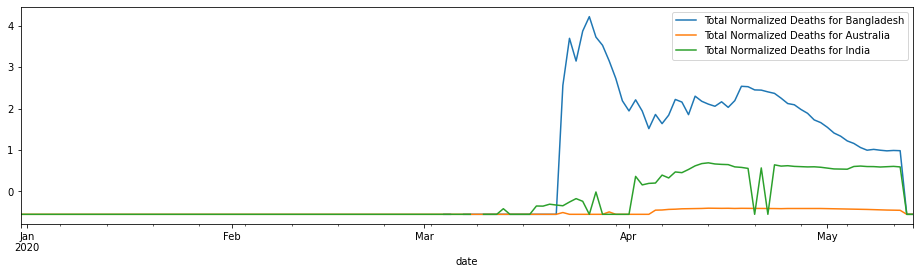

In [287]:
data_plot_deaths.plot()

In [288]:
data_plot_cases = pd.DataFrame({"Total Normalized Cases for Bangladesh": bangladesh["total_cases_normalized"],
                                "Total Normalized Cases for Australia": australia["total_cases_normalized"],
                                "Total Normalized Cases for India": india["total_cases_normalized"]})

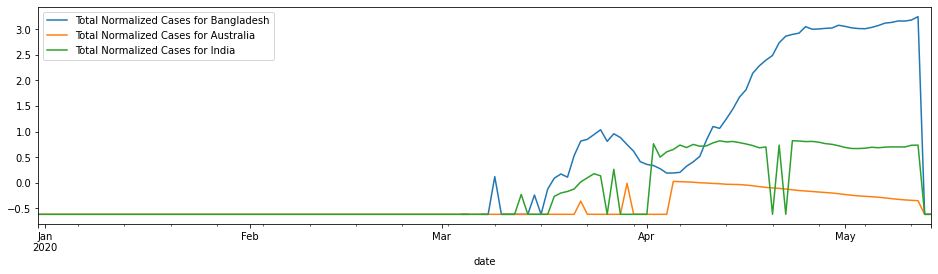

In [289]:
data_plot_cases.plot()

In [315]:
data_plot_deaths_smooth = data_plot_deaths.rolling(window=6).mean()

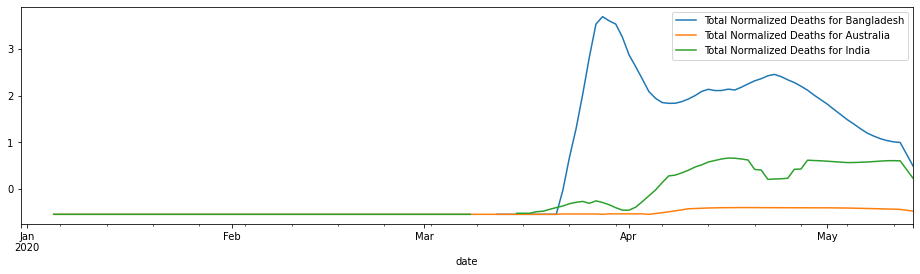

In [316]:
data_plot_deaths_smooth.plot()

In [317]:
data_plot_cases_smooth = data_plot_cases.rolling(window=6).mean()

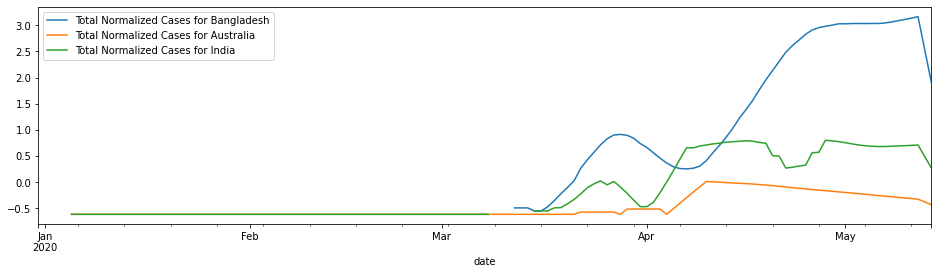

In [318]:
data_plot_cases_smooth.plot()

In [238]:
#data_plot_deaths.plot().get_figure().savefig("covid-deaths.png")
#data_plot_cases.plot().get_figure().savefig("covid-cases.png")